In [1]:
import os, random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
from tqdm import tqdm_notebook
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

In [22]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from tensorflow.keras.layers import Lambda, RepeatVector, Reshape
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, GlobalMaxPool2D
from tensorflow.keras.layers import concatenate, add
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [4]:
im_width = 128
im_height = 128
border = 5

In [5]:
# List names of all images in the folder
ids = next(os.walk("images"))[2]
print("Number of images : ", len(ids))

# To print names of images
for i in range(10):
    print(ids[i])

Number of images :  4000
44381a3f55.png
70db04a203.png
42c563d895.png
d422a9eb8f.png
6d4fca6a35.png
7ebd3f0cdd.png
99d7f0c538.png
f43f1e7456.png
c756ff4e1f.png
ff238df1c4.png


In [6]:
X = np.zeros(
    (len(ids), im_height, im_width, 1),
    dtype = np.float32
)

y = np.zeros(
    (len(ids), im_height, im_width, 1),
    dtype = np.float32
)

#print(X.shape)
#print(y.shape)

(4000, 128, 128, 1)
(4000, 128, 128, 1)


In [7]:
for i, j in enumerate(ids):
    print("Number : ", i,
          "\n", " Name : ", j, end="\n\n")

Number :  0 
  Name :  44381a3f55.png

Number :  1 
  Name :  70db04a203.png

Number :  2 
  Name :  42c563d895.png

Number :  3 
  Name :  d422a9eb8f.png

Number :  4 
  Name :  6d4fca6a35.png

Number :  5 
  Name :  7ebd3f0cdd.png

Number :  6 
  Name :  99d7f0c538.png

Number :  7 
  Name :  f43f1e7456.png

Number :  8 
  Name :  c756ff4e1f.png

Number :  9 
  Name :  ff238df1c4.png

Number :  10 
  Name :  1f33387a8e.png

Number :  11 
  Name :  fefe01ac32.png

Number :  12 
  Name :  8d70a676cd.png

Number :  13 
  Name :  aa1c0ba47b.png

Number :  14 
  Name :  88839f49f9.png

Number :  15 
  Name :  343b0359b5.png

Number :  16 
  Name :  13f448be07.png

Number :  17 
  Name :  331ec135dd.png

Number :  18 
  Name :  81e9af5ee2.png

Number :  19 
  Name :  56ab4fae30.png

Number :  20 
  Name :  6abe55deaf.png

Number :  21 
  Name :  822043d604.png

Number :  22 
  Name :  c82ae5f941.png

Number :  23 
  Name :  4cfee4b097.png

Number :  24 
  Name :  6074c5b0bf.png

Number :  

  Name :  1263576548.png

Number :  488 
  Name :  8bf499cb0c.png

Number :  489 
  Name :  7d41b0a6e1.png

Number :  490 
  Name :  9ccf50ab0e.png

Number :  491 
  Name :  dfe230b677.png

Number :  492 
  Name :  f6e87c1458.png

Number :  493 
  Name :  7f99abfc11.png

Number :  494 
  Name :  c58124fdc4.png

Number :  495 
  Name :  6edba13f1b.png

Number :  496 
  Name :  c4ed7cdb1c.png

Number :  497 
  Name :  2ebe2eba03.png

Number :  498 
  Name :  8fd4178b11.png

Number :  499 
  Name :  0d8ed16206.png

Number :  500 
  Name :  d538594e14.png

Number :  501 
  Name :  0937b1df3f.png

Number :  502 
  Name :  63feb8de2b.png

Number :  503 
  Name :  057eae4f34.png

Number :  504 
  Name :  8612ca9286.png

Number :  505 
  Name :  e683e8ae69.png

Number :  506 
  Name :  abe74273c8.png

Number :  507 
  Name :  56d025f76c.png

Number :  508 
  Name :  a9ee40cf0d.png

Number :  509 
  Name :  7ed79f8f56.png

Number :  510 
  Name :  3ec30a713c.png

Number :  511 
  Name :  613218

Number :  1172 
  Name :  bd7b74689d.png

Number :  1173 
  Name :  31250cef62.png

Number :  1174 
  Name :  71d3bf0ea8.png

Number :  1175 
  Name :  b04c03e3d4.png

Number :  1176 
  Name :  99aefa9443.png

Number :  1177 
  Name :  20ed65cbf8.png

Number :  1178 
  Name :  82a285227e.png

Number :  1179 
  Name :  8daf098aa9.png

Number :  1180 
  Name :  c9f7f4020f.png

Number :  1181 
  Name :  a076699b79.png

Number :  1182 
  Name :  ca511bc319.png

Number :  1183 
  Name :  25bbbcd4a4.png

Number :  1184 
  Name :  c4b05c2eaa.png

Number :  1185 
  Name :  c2ca0ed857.png

Number :  1186 
  Name :  14c16f99d5.png

Number :  1187 
  Name :  6a1fe1a81e.png

Number :  1188 
  Name :  db75c6831e.png

Number :  1189 
  Name :  9ce55dc2c9.png

Number :  1190 
  Name :  d8b1bbbfdf.png

Number :  1191 
  Name :  9b09626522.png

Number :  1192 
  Name :  df5df272fb.png

Number :  1193 
  Name :  5f8370ed60.png

Number :  1194 
  Name :  ce1f9711bc.png

Number :  1195 
  Name :  9f07d6a0

  Name :  613fb95edf.png

Number :  1822 
  Name :  645abba5ec.png

Number :  1823 
  Name :  a2a9c0c00a.png

Number :  1824 
  Name :  390355fd73.png

Number :  1825 
  Name :  407bd44d31.png

Number :  1826 
  Name :  966fb0cdbb.png

Number :  1827 
  Name :  4ef0559016.png

Number :  1828 
  Name :  465f93cd9c.png

Number :  1829 
  Name :  107f1047c1.png

Number :  1830 
  Name :  94c2d96e56.png

Number :  1831 
  Name :  444c32935c.png

Number :  1832 
  Name :  ede9c03a6f.png

Number :  1833 
  Name :  e92f67b3c7.png

Number :  1834 
  Name :  618f843c7a.png

Number :  1835 
  Name :  ef13247eed.png

Number :  1836 
  Name :  b51eed936a.png

Number :  1837 
  Name :  d46c133c20.png

Number :  1838 
  Name :  cf1ffe14e0.png

Number :  1839 
  Name :  20b11dcfb8.png

Number :  1840 
  Name :  9c4c524983.png

Number :  1841 
  Name :  9539d280a6.png

Number :  1842 
  Name :  7b0c7e28f0.png

Number :  1843 
  Name :  eff595dbcc.png

Number :  1844 
  Name :  c92c37ecd7.png

Number :

  Name :  48a18f5386.png

Number :  2545 
  Name :  619edf8941.png

Number :  2546 
  Name :  628ea36ba6.png

Number :  2547 
  Name :  7a0c8915be.png

Number :  2548 
  Name :  e9ce8188b9.png

Number :  2549 
  Name :  0ff9f243e5.png

Number :  2550 
  Name :  b012e9ebb0.png

Number :  2551 
  Name :  0f9b1dbc3f.png

Number :  2552 
  Name :  4696bb53e6.png

Number :  2553 
  Name :  9d173ec22a.png

Number :  2554 
  Name :  6dc7a51dd9.png

Number :  2555 
  Name :  3b5e9c6e05.png

Number :  2556 
  Name :  4e7d4502bc.png

Number :  2557 
  Name :  c10ff1398a.png

Number :  2558 
  Name :  d82b80a555.png

Number :  2559 
  Name :  459396b418.png

Number :  2560 
  Name :  f2c869e655.png

Number :  2561 
  Name :  0ea5ea6946.png

Number :  2562 
  Name :  5d4dcb9d8b.png

Number :  2563 
  Name :  c98dfd50ba.png

Number :  2564 
  Name :  32f1039c61.png

Number :  2565 
  Name :  feb90d8376.png

Number :  2566 
  Name :  d0cd29a61b.png

Number :  2567 
  Name :  919bc0e2ba.png

Number :

  Name :  b1f0e104f5.png

Number :  3241 
  Name :  ea5dd02892.png

Number :  3242 
  Name :  ff9b7d0d2e.png

Number :  3243 
  Name :  e2d3957c95.png

Number :  3244 
  Name :  8b5232fcfa.png

Number :  3245 
  Name :  d9044ee3c6.png

Number :  3246 
  Name :  05d9351a35.png

Number :  3247 
  Name :  98870eab9e.png

Number :  3248 
  Name :  f8b721f632.png

Number :  3249 
  Name :  9704b1ba61.png

Number :  3250 
  Name :  891fa63295.png

Number :  3251 
  Name :  b76b065012.png

Number :  3252 
  Name :  2fb6791298.png

Number :  3253 
  Name :  96f26f6397.png

Number :  3254 
  Name :  b57e98a275.png

Number :  3255 
  Name :  1770691c51.png

Number :  3256 
  Name :  9a4b15919d.png

Number :  3257 
  Name :  3501da04b2.png

Number :  3258 
  Name :  8270908d6a.png

Number :  3259 
  Name :  a00d2b180c.png

Number :  3260 
  Name :  a291ef5d83.png

Number :  3261 
  Name :  e1ce826217.png

Number :  3262 
  Name :  894d0e63f5.png

Number :  3263 
  Name :  ebc46e6691.png

Number :

  Name :  bec8f132d0.png

Number :  3915 
  Name :  b981d35c43.png

Number :  3916 
  Name :  1306fcee4c.png

Number :  3917 
  Name :  769d51b80b.png

Number :  3918 
  Name :  3df62de11d.png

Number :  3919 
  Name :  62a8f89a19.png

Number :  3920 
  Name :  de5a329823.png

Number :  3921 
  Name :  0bdd44d530.png

Number :  3922 
  Name :  76761b2a41.png

Number :  3923 
  Name :  e7a5e5e55f.png

Number :  3924 
  Name :  d6b87a521f.png

Number :  3925 
  Name :  c026a17632.png

Number :  3926 
  Name :  1a8a17f220.png

Number :  3927 
  Name :  f139be21a4.png

Number :  3928 
  Name :  eac3fb300e.png

Number :  3929 
  Name :  dd9a94a797.png

Number :  3930 
  Name :  963210b127.png

Number :  3931 
  Name :  1a28f06897.png

Number :  3932 
  Name :  49fe2ee7ba.png

Number :  3933 
  Name :  65ef110246.png

Number :  3934 
  Name :  132e30cffd.png

Number :  3935 
  Name :  59dfd4c7e5.png

Number :  3936 
  Name :  e82421363e.png

Number :  3937 
  Name :  e0b778dacd.png

Number :

In [8]:
# Image in jpeg,pnng etc can be converted to numpy array by using img_to_array()
for n, id_ in tqdm_notebook(enumerate(ids)):
    
    # Load images
    img = load_img("images/" + id_, grayscale = True)
    x_img = img_to_array(img)
    x_img = resize(x_img, (128,128,1), mode = 'constant', preserve_range = True)
    
    # Load masks
    mask = img_to_array(load_img("masks/" + id_, grayscale = True))
    mask = resize(mask, (128,128,1), mode = 'constant', preserve_range = True)
    
    #Save Images (normalised)
    X[n] = x_img/255.0
    y[n] = mask/255.0

/opt/anaconda3/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/opt/anaconda3/envs/notebook/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Split data into testing and training sets


In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1, random_state = 42)

Visualise any random image along with the mask 

Text(0.5, 1.0, 'Salt')

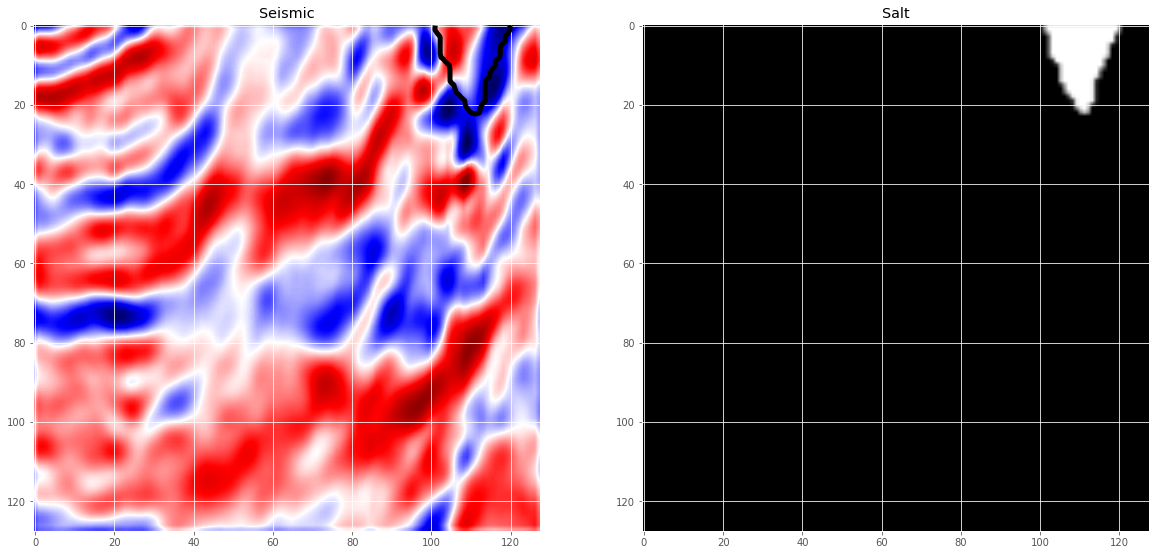

In [10]:
ix = random.randint(0, len(X_train))
has_mask = y_train[ix].max() > 0 # salt indicator

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 15))

ax1.imshow(X_train[ix, ..., 0], cmap = 'seismic', interpolation = 'bilinear')
if has_mask: # if salt
    # draw a boundary(contour) in the original image separating salt and non-salt areas
    ax1.contour(y_train[ix].squeeze(), colors = 'k', linewidths = 5, levels = [0.5])
ax1.set_title('Seismic')

ax2.imshow(y_train[ix].squeeze(), cmap = 'gray', interpolation = 'bilinear')
ax2.set_title('Salt')

In [19]:
# This function will add 2 Convolutional layers with the parameters passed to it

def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    
    # First Layer
    x = Conv2D(
        filters = n_filters,
        kernel_size = (kernel_size, kernel_size),
        kernel_initializer = 'he_normal',
        padding = 'same',
        )(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Second Layer
    x = Conv2D(
        filters = n_filters,
        kernel_size = (kernel_size, kernel_size),
        kernel_initializer = 'he_normal', padding = 'same'
    )(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

In [20]:
#This function defines the Architecture of the UNET model
def get_unet(input_img, n_filters = 16, dropout = 0.1, batchnorm = True):
    
    # Contracting Path
    c1 = conv2d_block(input_img, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)
    
    c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)
    
    c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)
    
    c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
    
    # Expansive Path
    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    
    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    
    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    
    u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [23]:
# Initialise a Tensor
input_img = Input((im_height, im_width, 1), name = "img")

model = get_unet(input_img, n_filters = 16, dropout = 0.05, batchnorm = True)
model.compile(optimizer = Adam(), loss = "binary_crossentropy", metrics = ["accuracy"])

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 128, 128, 16) 160         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization_13 (BatchNo (None, 128, 128, 16) 64          conv2d_13[0][0]                  
__________________________________________________________________________________________________
activation_11 (Activation)      (None, 128, 128, 16) 0           batch_normalization_13[0][0]     
______________________________________________________________________________________________

In [25]:
callbacks = [
    EarlyStopping(patience = 10, verbose = 1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model-tgs-salt.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [26]:
results = model.fit(X_train, y_train, batch_size = 32, epochs = 30, callbacks = callbacks,\
                   validation_data = (X_valid, y_valid))

Train on 3600 samples, validate on 400 samples
Epoch 1/30
3584/3600 [============================>.] - ETA: 0s - loss: 0.4782 - accuracy: 0.7861
Epoch 00001: val_loss improved from inf to 6.20353, saving model to model-tgs-salt.h5
3600/3600 [==============================] - 164s 46ms/sample - loss: 0.4773 - accuracy: 0.7867 - val_loss: 6.2035 - val_accuracy: 0.2767
Epoch 2/30
3584/3600 [============================>.] - ETA: 0s - loss: 0.3236 - accuracy: 0.8735
Epoch 00002: val_loss improved from 6.20353 to 3.93672, saving model to model-tgs-salt.h5
3600/3600 [==============================] - 162s 45ms/sample - loss: 0.3239 - accuracy: 0.8732 - val_loss: 3.9367 - val_accuracy: 0.4421
Epoch 3/30
3584/3600 [============================>.] - ETA: 0s - loss: 0.2865 - accuracy: 0.8847
Epoch 00003: val_loss improved from 3.93672 to 1.11089, saving model to model-tgs-salt.h5
3600/3600 [==============================] - 162s 45ms/sample - loss: 0.2864 - accuracy: 0.8847 - val_loss: 1.1109 - 

3584/3600 [============================>.] - ETA: 0s - loss: 0.1126 - accuracy: 0.9476
Epoch 00027: val_loss did not improve from 0.20507
3600/3600 [==============================] - 162s 45ms/sample - loss: 0.1131 - accuracy: 0.9474 - val_loss: 0.2153 - val_accuracy: 0.9048
Epoch 28/30
3584/3600 [============================>.] - ETA: 0s - loss: 0.1096 - accuracy: 0.9489
Epoch 00028: val_loss did not improve from 0.20507
3600/3600 [==============================] - 162s 45ms/sample - loss: 0.1101 - accuracy: 0.9487 - val_loss: 0.2149 - val_accuracy: 0.9054
Epoch 29/30
3584/3600 [============================>.] - ETA: 0s - loss: 0.1126 - accuracy: 0.9474
Epoch 00029: val_loss did not improve from 0.20507
3600/3600 [==============================] - 162s 45ms/sample - loss: 0.1127 - accuracy: 0.9473 - val_loss: 0.2166 - val_accuracy: 0.9042
Epoch 30/30
3584/3600 [============================>.] - ETA: 0s - loss: 0.1098 - accuracy: 0.9488
Epoch 00030: val_loss did not improve from 0.2050

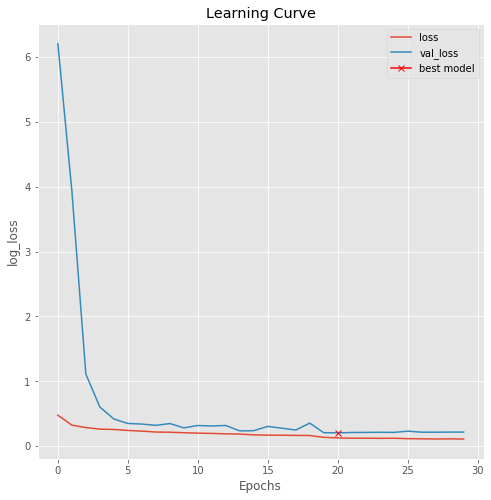

In [28]:
plt.figure(figsize=(8,8))
plt.title('Learning Curve')
plt.plot(results.history["loss"], label = "loss")
plt.plot(results.history["val_loss"], label = "val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend()

# Inferences

In [29]:
model.load_weights('model-tgs-salt.h5')

In [30]:
# Evaluate on validation set (i.e. the best from log_loss)
model.evaluate(X_valid, y_valid, verbose=1)

400/400 [==============================] - 3s 8ms/sample - loss: 0.2051 - accuracy: 0.9068


[0.20507308065891267, 0.9068071]

In [32]:
# Predict on train, val and test
preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_valid, verbose=1)

400/400 [==============================] - 4s 9ms/sample


In [34]:
# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)

<class 'numpy.ndarray'>


In [37]:
# Function to plot the results
def plot_sample(X, y, preds, binary_preds, ix = None):
    if ix is None:
        ix = random.randint(0, len(X))
    
    has_mask = y[ix].max() > 0
    
    fig, ax = plt.subplots(1,4, figsize = (20,20))
    ax[0].imshow(X[ix, ..., 0], cmap = 'seismic')
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('Seismic')

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('Salt')

    ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Salt Predicted')
    
    ax[3].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[3].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[3].set_title('Salt Predicted binary');

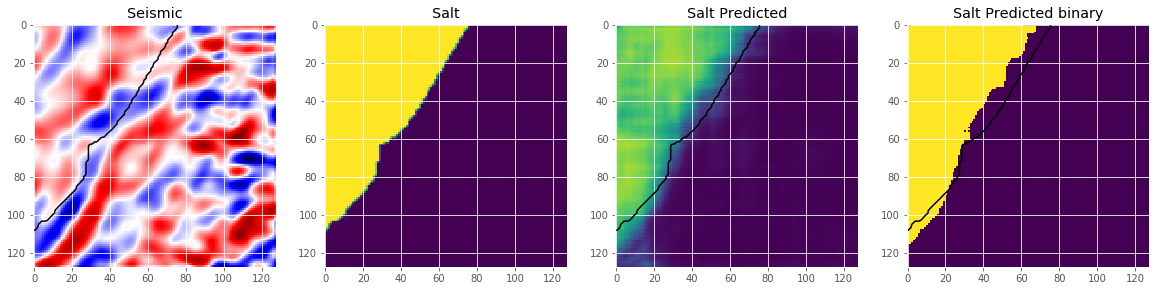

In [47]:
plot_sample(X_train, y_train, preds_train, preds_train_t)